#  Support Vector Machines Classifier
## Hyperparameter tuning with grid search and cross-validation

<img src="../images/SVM1.png" width="500">
<img src="../images/SVM2.png" width="300">

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.
<br>
<br>
The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function.<br>

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, the method is likely to give poor performances.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

## Import Python Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload

## Import Utility Classes

In [2]:
%autoreload 2
import sys
sys.path.append('..')

from utils.data_loader import DataLoader
from utils.term_counter_helper import TermFrequency, TfIdf
from utils.data_frame_helper import DataFrameHelper
from utils.model_evaluation_helper import ModelEvaluationHelper
from utils.classifier_helper import Classifier

## Load Data

In [3]:
loader = DataLoader()
content = loader.load_data("../Data/trainingdata.txt")

Number of Rows:  5485



In [4]:
label_names = np.array(["A", "B", "C", "D", "E", "F", "G", "H"])
df = loader.get_data_frame(content, label_names)
df_helper = DataFrameHelper(df, label_names)

5485 documents
8 categories


## Input Dataset in DataFrame Format

In [5]:
df_helper.df.head()

,Labels,Text
0,A,champion products ch approves stock split cham...
1,B,computer terminal systems cpml completes sale ...
2,A,cobanco inc cbco year net shr cts vs dlrs net ...
3,A,am international inc am nd qtr jan oper shr lo...
4,A,brown forman inc bfd th qtr net shr one dlr vs...


## Vectorization of Text Data with TF-IDF Featurization

In [6]:
min_df = 2

tfidf = TfIdf(
    label_names,
    norm='l2',
    smooth_idf = True,
    sublinear_tf = False,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words='english',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=0.8, # 0.5, 0.75, 1.0
    min_df = min_df,
    max_features=None,
    vocabulary=None)



tfidf.vectorize_corpus(df_helper.raw_text)
tfidf.vectorizer

Feature Matrix:
n_samples: 5485 
n_features: 10416


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## Split Dataset into Trainset and Testset

In [7]:
tfidf_model_evaluation = ModelEvaluationHelper(
    tfidf.X, df_helper.y, test_size=0.3, random_state=3,
    label_names = df_helper.label_names,
    feature_names = tfidf.vectorizer.get_feature_names())

Number of observations in Train: 3839
Number of observations in Test : 1646


## SVM Multi-Class Classification

<img src="../images/SVM3.png" width="600">

The SVM model implements the “one-against-one” approach (Knerr et al., 1990) for multi- class classification. If *n_class* is the number of classes, then *n_class * (n_class - 1) / 2* classifiers are constructed and each one trains data from two classes. 
<br>
<br>
On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained.

## Hyperparameters Search Space

In [8]:
hyperparameters = {'gamma': [1e-1, 1e-2],
                   'C': [100, 1000, 10000]
                   }

## Gaussian SVM Classifier

In [9]:
clf = Classifier()
gaussianSVM = clf.multinomial_SVM_clf("gaussianSVM", class_weight='balanced', shrinking=True, probability=False)

## Run Grid Search with Cross Validation

In [10]:
tfidf_model_evaluation.set_hyperparam_grid(hyperparameters)
tfidf_model_evaluation.cross_val_grid_search(gaussianSVM, "accuracy", cv = 5)


* Cross-Validation & Grid Search

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished



* Matrix Sparsity

matrix coefficents are only available when using a linear kernel

* Best Model Results

Best score: 0.963
Best parameters set:
	C: 1000
	gamma: 0.1

* Grid Search

Grid scores on training set:

0.962 (+/-0.014) for {'gamma': 0.1, 'C': 100}
0.957 (+/-0.013) for {'gamma': 0.01, 'C': 100}
0.963 (+/-0.013) for {'gamma': 0.1, 'C': 1000}
0.962 (+/-0.014) for {'gamma': 0.01, 'C': 1000}
0.963 (+/-0.013) for {'gamma': 0.1, 'C': 10000}
0.962 (+/-0.013) for {'gamma': 0.01, 'C': 10000}


* Detailed classification report

The model is trained on the full train set with cross-validation.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          A       0.98      0.98      0.98       826
          B       0.94      0.99      0.96       511
          C       0.91      0.94      0.92        63
          D       1.00      0.81      0.89        42
          E       1.00      0.40      0.57        10
          F       1.00      0.99 

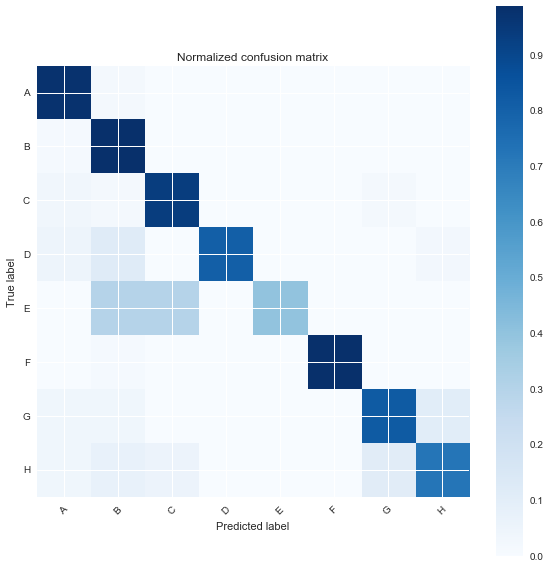

In [11]:
tfidf_model_evaluation.confusion_matrix()

## Polynomial SVM Classifier

In [12]:
polynomialSVM = clf.multinomial_SVM_clf(
    "polynomialSVM", class_weight='balanced', degree=3, shrinking=True, probability=False)

## Run Grid Search with Cross Validation

In [13]:
tfidf_model_evaluation.set_hyperparam_grid(hyperparameters)
tfidf_model_evaluation.cross_val_grid_search(polynomialSVM, "accuracy", cv = 5)


* Cross-Validation & Grid Search

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.0min finished



* Matrix Sparsity

matrix coefficents are only available when using a linear kernel

* Best Model Results

Best score: 0.812
Best parameters set:
	C: 10000
	gamma: 0.1

* Grid Search

Grid scores on training set:

0.477 (+/-0.189) for {'gamma': 0.1, 'C': 100}
0.089 (+/-0.194) for {'gamma': 0.01, 'C': 100}
0.681 (+/-0.031) for {'gamma': 0.1, 'C': 1000}
0.185 (+/-0.388) for {'gamma': 0.01, 'C': 1000}
0.812 (+/-0.028) for {'gamma': 0.1, 'C': 10000}
0.092 (+/-0.190) for {'gamma': 0.01, 'C': 10000}


* Detailed classification report

The model is trained on the full train set with cross-validation.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          A       0.98      0.91      0.95       826
          B       0.66      0.99      0.79       511
          C       1.00      0.46      0.63        63
          D       1.00      0.17      0.29        42
          E       1.00      0.10      0.18        10
          F       1.00      0.42

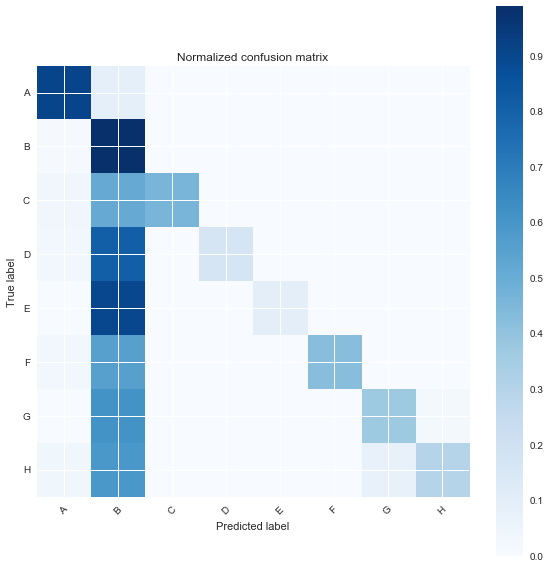

In [14]:
tfidf_model_evaluation.confusion_matrix()

## Linear SVM

In [15]:
linearSVM = clf.multinomial_SVM_clf("linearSVM", class_weight='balanced', shrinking=True, probability=False)

## Run Grid Search with Cross Validation

In [16]:
tfidf_model_evaluation.set_hyperparam_grid(hyperparameters)
tfidf_model_evaluation.cross_val_grid_search(polynomialSVM, "accuracy", cv = 5)


* Cross-Validation & Grid Search

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.2min finished



* Matrix Sparsity

matrix coefficents are only available when using a linear kernel

* Best Model Results

Best score: 0.812
Best parameters set:
	C: 10000
	gamma: 0.1

* Grid Search

Grid scores on training set:

0.477 (+/-0.189) for {'gamma': 0.1, 'C': 100}
0.089 (+/-0.194) for {'gamma': 0.01, 'C': 100}
0.681 (+/-0.031) for {'gamma': 0.1, 'C': 1000}
0.185 (+/-0.388) for {'gamma': 0.01, 'C': 1000}
0.812 (+/-0.028) for {'gamma': 0.1, 'C': 10000}
0.092 (+/-0.190) for {'gamma': 0.01, 'C': 10000}


* Detailed classification report

The model is trained on the full train set with cross-validation.
The scores are computed on the full test set.

             precision    recall  f1-score   support

          A       0.98      0.91      0.95       826
          B       0.66      0.99      0.79       511
          C       1.00      0.46      0.63        63
          D       1.00      0.17      0.29        42
          E       1.00      0.10      0.18        10
          F       1.00      0.42

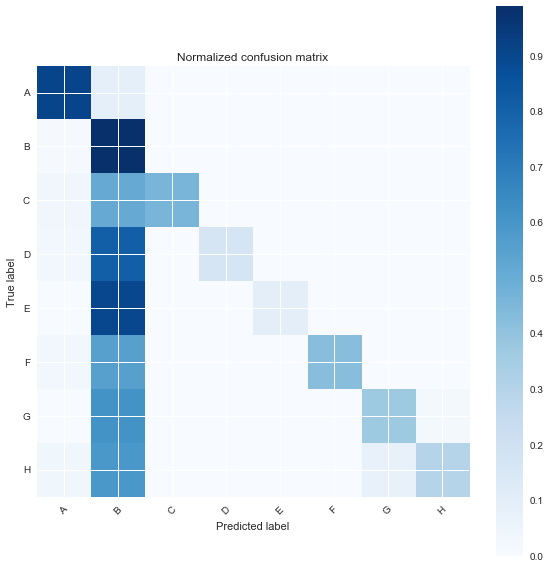

In [17]:
tfidf_model_evaluation.confusion_matrix()